In [1]:
from auxiliary.download_data import download_from_switch
download_from_switch(switch_path="/Gries", local_file_path="../.cache/data/Gries");

Download files from remote directory /Gries: 100%|██████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 4640.42it/s]


In [2]:
from auxiliary.read_gries_data import read_gries_txt_data
all_data = read_gries_txt_data(gries_path="../.cache/data/Gries", where="../.cache/interim/Gries/gries.parquet")

Read file: 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]


In [3]:
from auxiliary.auxiliary import read_pyarrow_data
all_data = read_pyarrow_data(where="../.cache/interim/Gries/gries.parquet")

2023-10-23 10:26:08 B01BPC10 auxiliary.auxiliary[13360] INFO shape: (9, 29)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ describe  ┆ datetime  ┆ ghi_2450_ ┆ ghi_2550_ ┆ … ┆ wind_spee ┆ wind_spee ┆ wind_spee ┆ wind_spe │
│ ---       ┆ ---       ┆ 2550      ┆ 2650      ┆   ┆ d_2950_30 ┆ d_3050_31 ┆ d_3150_32 ┆ ed_3250_ │
│ str       ┆ str       ┆ ---       ┆ ---       ┆   ┆ 50        ┆ 50        ┆ 50        ┆ 3350     │
│           ┆           ┆ f64       ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 149016    ┆ 149016.0  ┆ 149016.0  ┆ … ┆ 149016.0  ┆ 149016.0  ┆ 149016.0  ┆ 149016.0 │
│ null_coun ┆ 0         ┆ 53.0      ┆ 53.0      ┆ … ┆ 53.0      ┆ 53.0      ┆ 53.0      ┆ 53.0     │
│ t         ┆  

<Axes: >

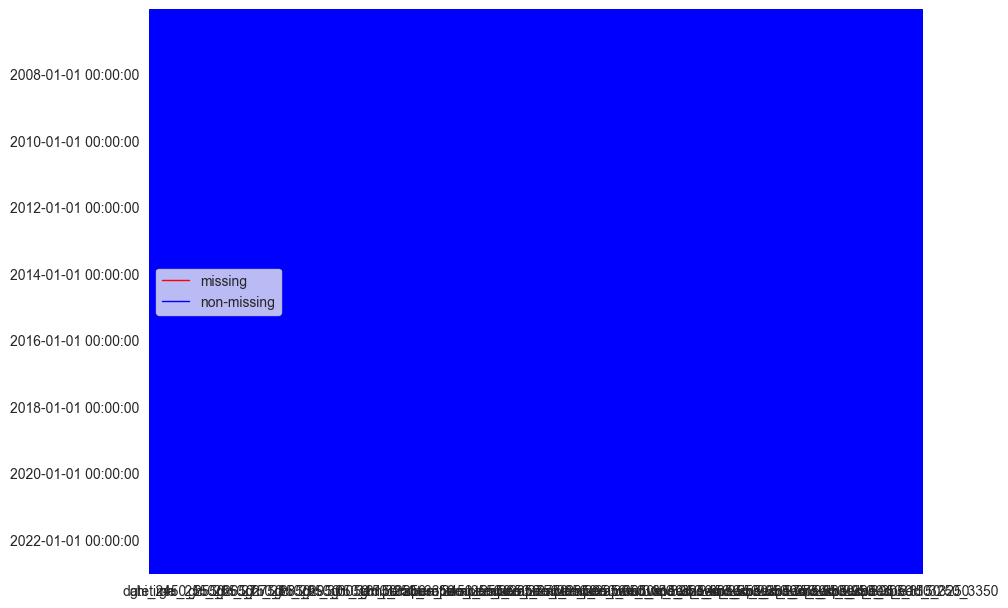

In [25]:
from pre_analyses.missing_gries_data import missing_matrix_gries
missing_matrix_gries(all_data)

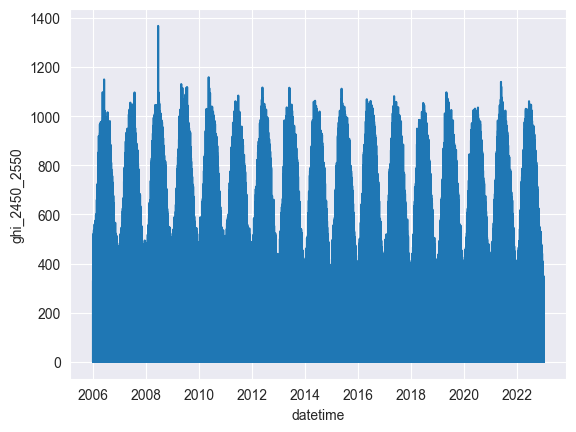

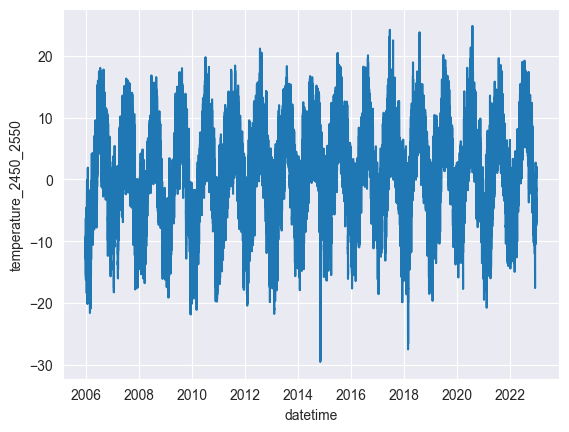

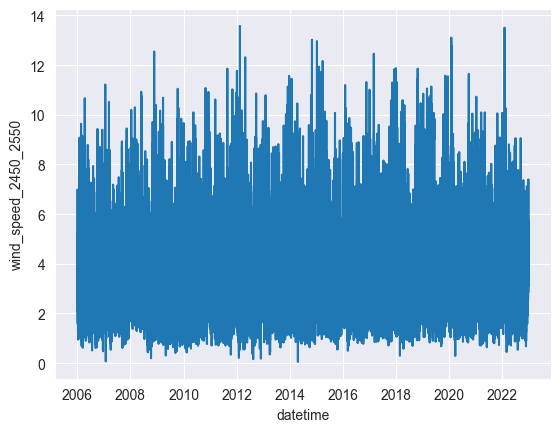

In [27]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = all_data.set_sorted("datetime", descending=False).upsample(time_column="datetime", every="1h").with_columns(pl.all().exclude(["datetime"]).fill_null(np.nan))
sns.lineplot(df, x="datetime", y="ghi_2450_2550")
plt.figure()
sns.lineplot(df, x="datetime", y="temperature_2450_2550")
plt.figure()
sns.lineplot(df, x="datetime", y="wind_speed_2450_2550");